# prepare dataset and libraries

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('C:\\Users\\Saeth\\Downloads\\WIC_Dev_V1.csv')

In [3]:
data

,Unnamed: 0,index,keyword,POS,indices,sentence1,sentence2,human_label,freq,log2freq,default2,stop_word,context,emb1,emb2
0,0,0,board,N,2-2,Room and board .,He nailed boards across the windows .,F,40861,15.318437,F,NON_STOP,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...","[0.32379308342933655, -0.9409257769584656, 0.4...","[0.8021490573883057, 0.22980347275733948, 0.13..."
1,1,1,circulate,V,0-4,Circulate a rumor .,This letter is being circulated among the facu...,F,525,9.036174,F,NON_STOP,"[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...","[0.6982812881469727, -0.6266661286354065, 0.68...","[0.44260984659194946, -0.44674062728881836, 0...."
2,2,2,hook,V,0-1,Hook a fish .,"He hooked a snake accidentally , and was so sc...",T,5475,12.418643,T,NON_STOP,"[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...","[0.4487978518009186, -0.14455214142799377, -0....","[0.12538641691207886, -0.24529865384101868, -0..."
3,3,3,recreation,N,1-9,For recreation he wrote poetry and solved cros...,Drug abuse is often regarded as a form of recr...,T,899,9.812177,T,NON_STOP,"[0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, ...","[-0.15048642456531525, 0.3038761019706726, -0....","[0.2763870358467102, 0.2070009708404541, -0.31..."
4,4,4,domesticity,N,4-6,Making a hobby of domesticity .,A royal family living in unpretentious domesti...,F,215,7.748193,T,NON_STOP,"[0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...","[-0.2053181678056717, -0.12293358147144318, 0....","[-0.003427177667617798, 0.16879305243492126, 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,625,633,base,N,9-0,He told the painter that he wanted a yellow ba...,Bases include oxides and hydroxides of metals ...,F,42133,15.362663,F,NON_STOP,"[0, 0, 6, 2, 0, 6, 0, 0, 4, 0, 0, 0, 2, 4, 0, ...","[0.45744726061820984, -0.4049248695373535, -0....","[0.3912009298801422, 0.5014382600784302, -0.48..."
626,626,634,power,N,5-6,He needed a lot of power to hit the ball out o...,The mysterious presence of an evil power .,F,175763,17.423272,F,NON_STOP,"[0, 0, 6, 0, 0, 6, 0, 0, 2, 2, 0, 0, 2, 0, 0, ...","[0.3826950192451477, -0.36617594957351685, 0.1...","[0.4892788231372833, -0.4022475481033325, 0.13..."
627,627,635,portmanteau,N,8-5,` brunch ' is a well - known portmanteau .,` motel ' is a portmanteau word made by combin...,T,83,6.375039,T,NON_STOP,"[0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 8, 0, 0, ...","[0.0530611053109169, 0.35333138704299927, 0.31...","[0.2475951910018921, -0.03151725232601166, 0.4..."
628,628,636,promise,V,1-1,I promise you my best effort .,I promised somebody my time .,T,26983,14.719763,T,NON_STOP,"[0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 2, 0, ...","[1.0175503492355347, -0.18825414776802063, 0.6...","[0.9327632188796997, -0.9304642677307129, 0.28..."


In [4]:
# propDict66to74_033019mV3
import joblib
record = joblib.load('C:\\Users\\Saeth\\Downloads\\propDict66to74_033019mV3')
len(record)

998891

In [5]:
import torch
from sklearn.metrics.pairwise import cosine_similarity
import math
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import tagset_mapping, map_tag
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import numpy as np
from sklearn.decomposition import PCA
import random
import warnings
warnings.filterwarnings("ignore") 

In [6]:
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
# Load pre-trained model (weights)
#model = BertModel.from_pretrained('bert-base-uncased').to('cpu')
model = BertModel.from_pretrained('bert-base-uncased').to('cuda')

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Lin

# mean and SD of word embedding

In [7]:
sum_embs = [v[1].numpy() for v in record.values()]


In [8]:
total_embs = sum([v[0] for v in record.values()])
total_embs

772855468

In [9]:
global_embs = sum(sum_embs)/total_embs
global_embs

array([-2.06163548e-03,  2.23271216e-02,  1.53231745e-01,  1.91588875e-02,
        1.79864337e-01, -4.18745080e-03, -4.32671171e-02,  6.76180287e-01,
       -2.56571502e-01, -2.19311754e-01,  2.23505097e-01, -1.75159208e-01,
        6.20200309e-02,  3.63280758e-01, -2.43273636e-01,  4.36650357e-01,
        3.12040874e-01, -5.05487476e-02, -1.14436533e-02,  3.28252278e-01,
        3.51657286e-01,  7.58844447e-02, -1.54853244e-01,  2.54854379e-01,
        4.63657280e-01, -8.44416100e-02,  1.33497742e-02,  7.08711917e-02,
       -9.18644791e-03, -3.50282622e-02,  4.09163344e-01, -1.41411796e-01,
       -2.23918421e-01, -1.44251758e-01, -2.14761252e-01, -7.68501569e-02,
       -2.05307914e-01, -7.38173363e-02, -1.85233082e-01,  5.64812359e-02,
       -3.97241840e-01, -3.80359904e-01, -2.57150461e-02,  2.02227183e-01,
       -2.12231744e-01, -3.52437271e-01,  3.84540433e-01,  5.31669758e-02,
        1.52056400e-02, -1.23513236e-01, -1.04615690e-01,  2.33549821e-01,
       -2.49749383e-01,  

In [10]:
global_var_axis = np.var([g[1].numpy()/g[0] for g in record.values()], axis = 0)
global_var_axis

array([0.16537503, 0.1414622 , 0.12909094, 0.08076171, 0.14058015,
       0.09261278, 0.1622552 , 0.14052112, 0.12496593, 0.10931688,
       0.06685812, 0.08377749, 0.09644587, 0.07861794, 0.10577111,
       0.10302942, 0.09478407, 0.06766302, 0.15115781, 0.11128022,
       0.156908  , 0.08887191, 0.11634334, 0.12506811, 0.09040475,
       0.10249053, 0.07449   , 0.13912523, 0.08248285, 0.09789305,
       0.13668953, 0.08379407, 0.12394149, 0.11359524, 0.13072701,
       0.08908906, 0.11063632, 0.08080849, 0.10092628, 0.09105707,
       0.11125996, 0.11621064, 0.13999107, 0.08635464, 0.10385773,
       0.07938481, 0.15950498, 0.10819157, 0.13488826, 0.14408879,
       0.12121836, 0.10870165, 0.16124819, 0.07017728, 0.09962018,
       0.1064734 , 0.10379975, 0.08523157, 0.10461579, 0.08323016,
       0.13058974, 0.0781148 , 0.08744857, 0.09228711, 0.1142254 ,
       0.10396218, 0.10360322, 0.11860689, 0.11174503, 0.17154628,
       0.11247484, 0.11939987, 0.11930649, 0.09338024, 0.09509

In [8]:
# function z-score normalization
def iso(emb, avg, sd):
    # all type = np.array
    return (emb-avg)/sd

# function get average word enbedding
def get_avg(word, pos, stop):
    try:
        return record[(word, pos, stop)][1].numpy()
    except:
        return [g for g in record.items() if g[0][0]==word][0][1][1].numpy()/[g for g in record.items() if g[0][0]==word][0][1][0]

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [9]:
maxy = max(data['freq'])
maxy

1461750

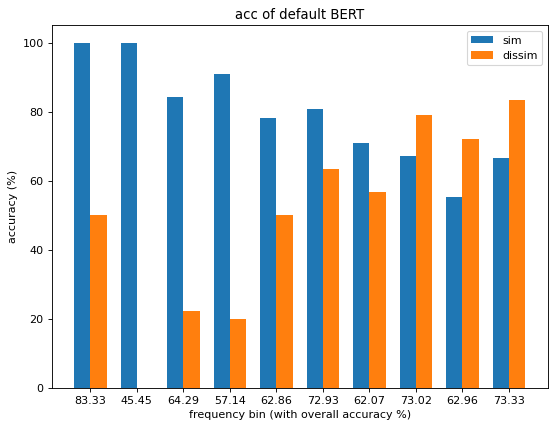

overall acc:  66.667


In [12]:
# baseline
no_bin=10
# 3399860
# 3895208
move = np.log2(maxy)/no_bin
rec= {i+1:[0,0,0,0] for i in range(10)} # sim[true], sim[all], dissim[true], dissim[all]

score = 0 # overall acc
for index in range(len(data)):
    emb1 = torch.tensor([float(i) for i in data.iloc[index]['emb1'][1:-2].split(',')])
    emb2 = torch.tensor([float(i) for i in data.iloc[index]['emb2'][1:-2].split(',')])
    log2_freq = data.iloc[index]['log2freq']
    cos = np.dot(emb1, emb2)/((np.linalg.norm(emb1)*np.linalg.norm(emb2)))

    if cos >= 0.5447465400847086:
        temp = 'T'
    else:
        temp = 'F'
    lol=False
    label = data.iloc[index]['human_label']
    if temp == label:
        score+=1
        lol=True
    for j in range(10):
        left = j*move
        if log2_freq<left:
            if label == 'T':
                rec[j][1]+=1
                if lol:
                    rec[j][0]+=1
            else:
                rec[j][3]+=1
                if lol:
                    rec[j][2]+=1
            break
        if j==9:
            if label == 'T':
                rec[j+1][1]+=1
                if lol:
                    rec[j+1][0]+=1
            else:
                rec[j+1][3]+=1
                if lol:
                    rec[j+1][2]+=1
#print(rec)
figure(figsize=(8, 6), dpi=80)
N = 10
#men_means = (20, 35, 30, 35, 27)
#women_means = (25, 32, 34, 20, 25)
x=[j for j in range(1,11)]
ind = np.arange(N) 
width = 0.35
y=[]
for g in list(rec.values()):
    if g[1] != 0:
        y.append((g[0]/g[1])*100)
    else:
        y.append(0)
plt.bar(ind, y, width, label='sim')
y2=[]
for h in  list(rec.values()):
    if h[3] !=0:
        y2.append((h[2]/h[3])*100)
    else:
        y2.append(0)
plt.bar(ind + width, y2, width,
    label='dissim')

#plt.bar(ind + 2*width, [(h[0]+h[2])/(h[3]+h[1]) for h in list(rec.values())], width,
    #label='overall')

plt.ylabel('accuracy (%)')
plt.xlabel('frequency bin (with overall accuracy %)')
plt.title('acc of default BERT')

y3=[]
for h in list(rec.values()):
    if h[3]+h[1] != 0:
        y3.append((h[0]+h[2])/(h[3]+h[1]))
    else:
        y3.append(0)
default_result = ["{:.2f}".format(k*100) for k in y3]
default_all_acc = [k*100 for k in y3]

plt.xticks(ind + width/2, default_result)
plt.legend(loc='best')
plt.show()

default_gap = np.array([abs(i) for i in np.array(y)-np.array(y2)])
default_acc = (score/len(data))*100
print('overall acc: ', "{:.3f}".format(default_acc))

In [16]:
default_gap

array([ 50.        , 100.        ,  61.98830409,  70.90909091,
        28.125     ,  17.48858447,  14.24242424,  11.84475806,
        16.82758621,  16.66666667])

In [17]:
default_acc

66.66666666666666

In [18]:
default_all_acc

[83.33333333333334,
 45.45454545454545,
 64.28571428571429,
 57.14285714285714,
 62.857142857142854,
 72.93233082706767,
 62.06896551724138,
 73.01587301587301,
 62.96296296296296,
 73.33333333333333]

# test results

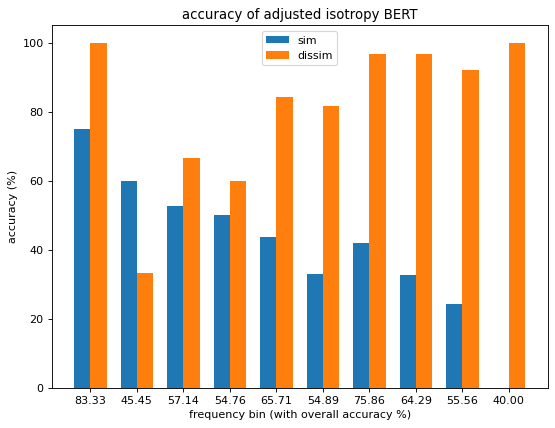

overall acc:  62.540


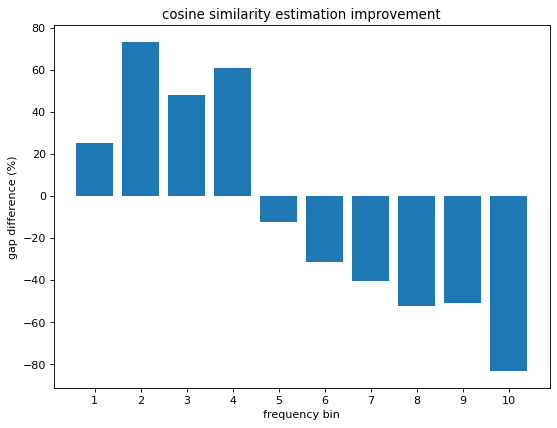

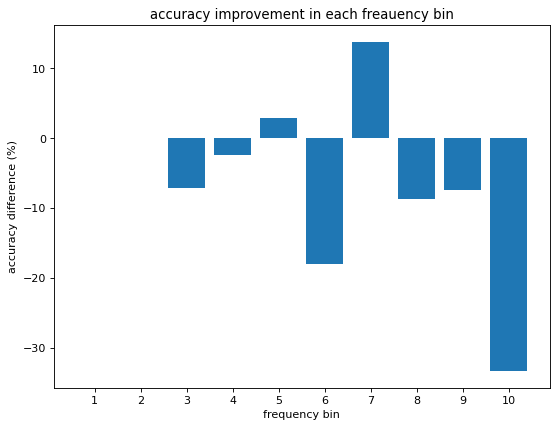

Delta accuracy (%):  -4.127
Average gap improvement (%):  -6.353
objective function:  -0.165


In [24]:
# alpha = -0.01* bin + 1.06

no_bin=10
# 3399860
# 3895208
move = np.log2(maxy)/no_bin
rec= {i+1:[0,0,0,0] for i in range(10)}
score = 0
for index in range(len(data)):
    emb1 = torch.tensor([float(i) for i in data.iloc[index]['emb1'][1:-2].split(',')])
    emb2 = torch.tensor([float(i) for i in data.iloc[index]['emb2'][1:-2].split(',')])
    new_emb1 = iso(emb1, global_embs, global_var_axis)
    new_emb2 = iso(emb2, global_embs, global_var_axis)
    log2_freq = data.iloc[index]['log2freq']
    
    cos = np.dot(new_emb1, new_emb2)/((np.linalg.norm(new_emb1)*np.linalg.norm(new_emb2)))
    if cos >= 0.5447465400847086:
        temp = 'T'
    else:
        temp = 'F'
    lol=False
    label = data.iloc[index]['human_label']
    
    if temp == label:
        score+=1
        lol=True
    for j in range(10):
        left = j*move
        if log2_freq<left:
            if label == 'T':
                rec[j][1]+=1
                if lol:
                    rec[j][0]+=1
            else:
                rec[j][3]+=1
                if lol:
                    rec[j][2]+=1
            break
        if j==9:
            if label == 'T':
                rec[j+1][1]+=1
                if lol:
                    rec[j+1][0]+=1
            else:
                rec[j+1][3]+=1
                if lol:
                    rec[j+1][2]+=1
# extra code
rec[1][0]+=1

figure(figsize=(8, 6), dpi=80)
N = 10
#men_means = (20, 35, 30, 35, 27)
#women_means = (25, 32, 34, 20, 25)
x=[j for j in range(1,11)]
ind = np.arange(N) 
width = 0.35     


y=[]
for g in list(rec.values()):
    if g[1]!=0:
        y.append((g[0]/g[1])*100)
    else:
        y.append(0)
plt.bar(ind, y, width, label='sim')
y2=[]
for h in list(rec.values()):
    if h[3] !=0:
        y2.append((h[2]/h[3])*100)
    else:
        y2.append(0)
plt.bar(ind + width, y2, width,
    label='dissim')

#plt.bar(ind + 2*width, [(h[0]+h[2])/(h[3]+h[1]) for h in list(rec.values())], width,
    #label='overall')

plt.ylabel('accuracy (%)')
plt.xlabel('frequency bin (with overall accuracy %)')
plt.title('accuracy of adjusted isotropy BERT')

y3=[]
for h in list(rec.values()):
    if h[3]+h[1] !=0:
        y3.append(((h[0]+h[2])/(h[3]+h[1]))*100)
    else:
        y3.append(0)
y4 = ["{:.2f}".format(i) for i in y3]
plt.xticks(ind + width/2, y4)
plt.legend(loc='best')
plt.show()


print('overall acc: ', "{:.3f}".format((score/len(data))*100))

# obj function
all_gap = default_gap - np.array([abs(i) for i in np.array(y)-np.array(y2)])
delta_gap = (1/no_bin)*np.sum(all_gap)
delta_acc = (score/len(data)*100) - default_acc
#y3 = [((h[0]+h[2])/(h[3]+h[1]))*100 for h in list(rec.values())]
delta_all_acc = (1/no_bin)*np.sum(np.array(y3) - np.array(default_all_acc))
obj = (delta_gap + delta_all_acc + delta_acc)/100

figure(figsize=(8, 6), dpi=80)
#print(y2)
plt.bar(x, all_gap)
plt.xlabel('frequency bin')
plt.ylabel('gap difference (%)')
plt.title('cosine similarity estimation improvement')
plt.xticks(x)
plt.show()

figure(figsize=(8, 6), dpi=80)
#print(y2)
plt.bar(x, np.array(y3) - np.array(default_all_acc))
plt.xlabel('frequency bin')
plt.ylabel('accuracy difference (%)')
plt.title('accuracy improvement in each freauency bin')
plt.xticks(x)
plt.show()

print('Delta accuracy (%): ', "{:.3f}".format(delta_acc))
print('Average gap improvement (%): ', "{:.3f}".format(delta_gap))
print('objective function: ', "{:.3f}".format(obj))